In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [30]:
combined_imputed_data = pd.read_csv("data/combined_imputed_data.csv")
combined_imputed_data

,pERK,Rad51,CCND1,Vimentin,aSMA,Ecad,ER,PR,EGFR,pRB,...,HER2,Area,MajorAxisLength,MinorAxisLength,Solidity,Extent,Eccentricity,Origin,X_centroid,Y_centroid
0,-2.053947,-2.218077,-1.884682,-0.959125,1.026614,-1.297823,-2.112923,-1.012705,-0.904860,-0.819339,...,-0.103402,-1.116108,-0.994730,-1.018135,-0.543471,0.611786,0.263662,no_spatial 6,NaN,NaN
1,-1.982650,-2.573164,-2.214435,-0.907921,-1.803212,-1.541311,-2.458003,-1.415121,-1.582431,-1.283895,...,-0.273358,-1.284210,-1.461325,-0.883164,0.298460,0.812099,-0.775242,no_spatial 6,NaN,NaN
2,-5.000000,-5.000000,-3.548276,-2.039866,-2.169894,-1.631346,-2.742759,-1.955488,-2.106629,-1.640431,...,-0.525881,0.471122,0.812683,-0.087843,0.688971,0.870867,0.465650,no_spatial 6,NaN,NaN
3,-5.000000,-5.000000,-3.572672,-1.964700,-2.241191,-1.643040,-2.506585,-1.936532,-2.099758,-1.461181,...,-0.279121,-1.070006,-1.615125,-0.464135,0.064505,0.769552,-0.826378,no_spatial 6,NaN,NaN
4,-5.000000,-5.000000,-3.507313,-1.726823,-2.147032,-1.580741,-3.340441,-1.739939,-2.675175,-2.157746,...,-0.305655,-0.320688,-0.515965,-0.192589,0.631445,0.684254,-0.366531,no_spatial 6,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39473,-3.595006,-5.000000,-3.112899,-1.871904,-0.822100,-1.615115,-2.477666,-1.917842,-2.179673,-1.718813,...,-0.548079,-1.186827,-0.865030,-0.691785,0.367183,0.369774,-0.398443,spatial 6,1.748899,2.304240
39474,-5.000000,-5.000000,-3.620415,-2.008235,-2.273108,-1.624496,-2.897355,-1.923214,-2.132538,-1.640076,...,-0.234781,1.777429,2.945418,1.196525,-0.588648,-1.435929,0.723904,spatial 6,1.744292,2.304725
39475,-4.734637,-5.000000,-3.586597,-1.863037,-2.311429,-2.335826,-3.422086,-1.876359,-2.599526,-1.707427,...,-0.378002,-0.727918,-1.111020,-0.238784,0.155051,-0.709346,-0.381631,spatial 6,1.211813,2.331676
39476,-4.708312,-5.000000,-3.599913,-1.886476,-2.290937,-2.396006,-3.790603,-1.952563,-2.178062,-1.736037,...,-0.592916,0.237584,-0.094642,0.159112,-0.111113,0.160960,0.089627,spatial 6,1.212708,2.335189


In [31]:
max_neighbor = int(combined_imputed_data["Origin"].max().split(" ")[-1])
max_neighbor

6

In [32]:
sp_imputed_data = combined_imputed_data[~combined_imputed_data["Origin"].str.contains("no_spatial")].copy()
sp_imputed_data.reset_index(drop=True, inplace=True)
sp_imputed_data.head()

,pERK,Rad51,CCND1,Vimentin,aSMA,Ecad,ER,PR,EGFR,pRB,...,HER2,Area,MajorAxisLength,MinorAxisLength,Solidity,Extent,Eccentricity,Origin,X_centroid,Y_centroid
0,-2.053947,-1.150085,-2.129382,-0.959125,1.026614,-1.297823,-2.112923,-1.012705,-0.904860,-0.819339,...,-0.103402,-1.116108,-0.818076,-1.018135,-0.543471,0.611786,0.263662,spatial 6,-0.109048,-5.000000
1,-1.982650,-2.573164,-2.214435,-0.907921,-1.803212,-1.541311,-2.458003,-1.415121,-1.582431,-1.283895,...,-0.273358,-1.284210,-1.461325,-0.883164,0.298460,0.812099,-0.499632,spatial 6,-0.109126,-5.000000
2,-5.000000,-5.000000,-3.548276,-2.039866,-2.169894,-1.631346,-3.141062,-1.955488,-2.106629,-1.640431,...,-0.554522,0.471122,0.812683,-0.087843,0.688971,0.555202,0.465650,spatial 6,1.154340,-3.723617
3,-5.000000,-4.852169,-3.572672,-1.964700,-2.241191,-1.643040,-2.506585,-1.936532,-2.099758,-1.461181,...,-0.279121,-1.070006,-1.615125,-0.464135,0.064505,0.769552,-0.826378,spatial 6,-0.134498,-3.214867
4,-5.000000,-5.000000,-3.507313,-1.726823,-2.147032,-1.580741,-3.198134,-1.739939,-2.576993,-1.988850,...,-0.305655,-0.320688,-0.515965,-0.192589,0.544952,0.684254,-1.087207,spatial 6,-0.796982,-2.571691


In [33]:
no_sp_imputed_data = combined_imputed_data[combined_imputed_data["Origin"].str.contains("no_spatial")].copy()
no_sp_imputed_data.drop(columns=["X_centroid","Y_centroid"], inplace=True)
no_sp_imputed_data.head()

,pERK,Rad51,CCND1,Vimentin,aSMA,Ecad,ER,PR,EGFR,pRB,...,CK17,CK7,HER2,Area,MajorAxisLength,MinorAxisLength,Solidity,Extent,Eccentricity,Origin
0,-2.053947,-2.218077,-1.884682,-0.959125,1.026614,-1.297823,-2.112923,-1.012705,-0.904860,-0.819339,...,-0.354849,-0.412079,-0.103402,-1.116108,-0.994730,-1.018135,-0.543471,0.611786,0.263662,no_spatial 6
1,-1.982650,-2.573164,-2.214435,-0.907921,-1.803212,-1.541311,-2.458003,-1.415121,-1.582431,-1.283895,...,-0.423928,-0.058681,-0.273358,-1.284210,-1.461325,-0.883164,0.298460,0.812099,-0.775242,no_spatial 6
2,-5.000000,-5.000000,-3.548276,-2.039866,-2.169894,-1.631346,-2.742759,-1.955488,-2.106629,-1.640431,...,-0.355895,-0.368080,-0.525881,0.471122,0.812683,-0.087843,0.688971,0.870867,0.465650,no_spatial 6
3,-5.000000,-5.000000,-3.572672,-1.964700,-2.241191,-1.643040,-2.506585,-1.936532,-2.099758,-1.461181,...,-0.365974,-0.166053,-0.279121,-1.070006,-1.615125,-0.464135,0.064505,0.769552,-0.826378,no_spatial 6
4,-5.000000,-5.000000,-3.507313,-1.726823,-2.147032,-1.580741,-3.340441,-1.739939,-2.675175,-2.157746,...,-0.517776,-0.115936,-0.305655,-0.320688,-0.515965,-0.192589,0.631445,0.684254,-0.366531,no_spatial 6


In [34]:
# Load index replacments

In [35]:
index_replacements_df = pd.read_csv("data/index_replacements.csv")
index_replacements_df

,0,1,2,3,4
0,CD45,CCND1,MajorAxisLength,Rad51,CK7
1,AR,Eccentricity,CK19,CK14,CD45
2,CK7,CK14,HER2,Extent,ER
3,Rad51,cPARP,AR,CK14,Ki67
4,Solidity,pRB,Eccentricity,EGFR,ER
...,...,...,...,...,...
19734,MajorAxisLength,CCND1,HER2,pERK,aSMA
19735,CK17,ER,MinorAxisLength,Ki67,Area
19736,CK17,ER,Ecad,CD45,EGFR
19737,cPARP,Ecad,HER2,Area,ER


In [36]:
# Load features

In [37]:
features = combined_imputed_data.columns
features

Index(['pERK', 'Rad51', 'CCND1', 'Vimentin', 'aSMA', 'Ecad', 'ER', 'PR',
       'EGFR', 'pRB', 'CD45', 'Ki67', 'CK19', 'p21', 'CK14', 'AR', 'cPARP',
       'CK17', 'CK7', 'HER2', 'Area', 'MajorAxisLength', 'MinorAxisLength',
       'Solidity', 'Extent', 'Eccentricity', 'Origin', 'X_centroid',
       'Y_centroid'],
      dtype='object')

In [38]:
# Load normalized test data

In [39]:
normalized_test_data = pd.read_csv("data/normalized_test_data.csv")
normalized_test_data

,pERK,Rad51,CCND1,Vimentin,aSMA,Ecad,ER,PR,EGFR,pRB,...,CK7,HER2,Area,MajorAxisLength,MinorAxisLength,Solidity,Extent,Eccentricity,X_centroid,Y_centroid
0,-2.053947,-2.408625,-2.256200,-0.959125,1.026614,-1.297823,-2.112923,-1.012705,-0.904860,-0.819339,...,0.070202,-0.103402,-1.116108,-0.904799,-1.018135,-0.543471,0.611786,0.263662,-0.109048,-5.000000
1,-1.982650,-2.573164,-2.214435,-0.907921,-1.803212,-1.541311,-2.458003,-1.415121,-1.582431,-1.283895,...,-0.058681,-0.273358,-1.284210,-1.461325,-0.883164,0.298460,0.812099,-0.088532,-0.109126,-5.000000
2,-5.000000,-5.000000,-3.548276,-2.039866,-2.169894,-1.631346,-2.526238,-1.955488,-2.106629,-1.640431,...,0.158758,-0.291737,0.471122,0.812683,-0.087843,0.688971,1.055338,0.465650,1.154340,-3.723617
3,-5.000000,-5.000000,-3.572672,-1.964700,-2.241191,-1.643040,-2.506585,-1.936532,-2.099758,-1.461181,...,-0.166053,-0.279121,-1.070006,-1.615125,-0.464135,0.064505,0.769552,-0.826378,-0.134498,-3.214867
4,-5.000000,-5.000000,-3.507313,-1.726823,-2.147032,-1.580741,-1.881058,-1.739939,-2.019444,-1.216649,...,-0.115936,-0.305655,-0.320688,-0.515965,-0.192589,1.031430,0.684254,0.058586,-0.796982,-2.571691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19734,-5.000000,-5.000000,-3.586583,-1.871904,-2.258850,-1.615115,-2.477666,-1.917842,-2.179673,-1.718813,...,-0.443463,-0.366024,-1.186827,-1.592991,-0.691785,0.367183,0.369774,-0.398443,1.748899,2.304240
19735,-5.000000,-5.000000,-3.620415,-2.008235,-2.273108,-1.624496,-2.538128,-1.923214,-2.132538,-1.640076,...,-0.056794,-0.234781,1.370900,2.945418,-0.347925,-0.588648,-1.435929,0.723904,1.744292,2.304725
19736,-4.734637,-5.000000,-3.586597,-1.863037,-2.311429,-1.639740,-2.533249,-1.876359,-2.181547,-1.707427,...,-0.331200,-0.378002,-0.727918,-1.111020,-0.238784,0.155051,-0.709346,-0.381631,1.211813,2.331676
19737,-4.708312,-5.000000,-3.599913,-1.886476,-2.290937,-1.637294,-2.532161,-1.952563,-2.178062,-1.736037,...,-0.297342,-0.357940,0.001287,-0.094642,0.159112,-0.111113,0.160960,0.089627,1.212708,2.335189


In [40]:
# Load phenotypes

combined_phenotypes = pd.read_csv("data/combined_mapped_phenotypes.csv")
combined_phenotypes.head()

,1,2,3,4,5,6,Base Cell,Origin
0,Stroma (aSMA+),Immune,Immune,Immune,Immune,Immune,Stroma (aSMA+),no_spatial 6
1,Basal,Basal,Basal,Basal,Immune,Basal,Immune,no_spatial 6
2,Immune,Immune,Immune,Immune,Immune,Immune,Basal,no_spatial 6
3,Immune,Immune,Immune,Immune,Immune,Immune,Immune,no_spatial 6
4,Immune,Immune,Immune,Immune,Immune,Immune,Immune,no_spatial 6


In [41]:
# Assign phenotypes to imputed and normalized data

In [42]:
normalized_test_data["Phenotype"] = combined_phenotypes[combined_phenotypes["Origin"]==f"spatial {max_neighbor}"]["Base Cell"].values
sp_imputed_data["Phenotype"]= combined_phenotypes[combined_phenotypes["Origin"]==f"spatial {max_neighbor}"]["Base Cell"].values
no_sp_imputed_data["Phenotype"]= combined_phenotypes[combined_phenotypes["Origin"]==f"no_spatial {max_neighbor}"]["Base Cell"].values
index_replacements_df["Phenotype"]= combined_phenotypes[combined_phenotypes["Origin"]==f"spatial {max_neighbor}"]["Base Cell"].values

In [43]:
normalized_test_data["Phenotype"].unique()

array(['Stroma (aSMA+)', 'Immune', 'Basal', 'Neoplastic Epithelial',
       'Luminal', 'Unknown'], dtype=object)

# Evaluate imutation performance

## Convert index replacement into expected form

In [48]:
basal_index_replacements = index_replacements_df[index_replacements_df["Phenotype"] == "Basal"].copy()
basal_index_replacements = basal_index_replacements.drop(columns=["Phenotype"]).T.to_dict()

luminal_index_replacements = index_replacements_df[index_replacements_df["Phenotype"] == "Luminal"].copy()
luminal_index_replacements = luminal_index_replacements.drop(columns=["Phenotype"]).T.to_dict()

immune_index_replacements = index_replacements_df[index_replacements_df["Phenotype"] == "Immune"].copy()
immune_index_replacements = immune_index_replacements.drop(columns=["Phenotype"]).T.to_dict()

stroma_index_replacements = index_replacements_df[index_replacements_df["Phenotype"] == "Stroma (aSMA+)"].copy()
stroma_index_replacements = stroma_index_replacements.drop(columns=["Phenotype"]).T.to_dict()

neo_index_replacements = index_replacements_df[index_replacements_df["Phenotype"] == "Neoplastic Epithelial"].copy()
neo_index_replacements = neo_index_replacements.drop(columns=["Phenotype"]).T.to_dict()

index_replacements = index_replacements_df.copy()
index_replacements = index_replacements.drop(columns=["Phenotype"]).T.to_dict()

print("Done")

Done


In [49]:
sp_basal_imputed = sp_imputed_data[sp_imputed_data["Phenotype"] == "Basal"].copy()
sp_luminal_imputed = sp_imputed_data[sp_imputed_data["Phenotype"] == "Luminal"].copy()
sp_immune_imputed = sp_imputed_data[sp_imputed_data["Phenotype"] == "Immune"].copy()
sp_stroma_imputed = sp_imputed_data[sp_imputed_data["Phenotype"] == "Stroma (aSMA+)"].copy()
sp_neo_imputed = sp_imputed_data[sp_imputed_data["Phenotype"] == "Neoplastic Epithelial"].copy()



no_sp_basal_imputed = no_sp_imputed_data[no_sp_imputed_data["Phenotype"] == "Basal"].copy()
no_sp_luminal_imputed = no_sp_imputed_data[no_sp_imputed_data["Phenotype"] == "Luminal"].copy()
no_sp_immune_imputed = no_sp_imputed_data[no_sp_imputed_data["Phenotype"] == "Immune"].copy()
no_sp_stroma_imputed = no_sp_imputed_data[no_sp_imputed_data["Phenotype"] == "Stroma (aSMA+)"].copy()
no_sp_neo_imputed = no_sp_imputed_data[no_sp_imputed_data["Phenotype"] == "Neoplastic Epithelial"].copy()



## Select cells based on phenotype

In [50]:
basal_test = normalized_test_data[normalized_test_data["Phenotype"] == "Basal"].copy()
luminal_test = normalized_test_data[normalized_test_data["Phenotype"] == "Luminal"].copy()
immune_test = normalized_test_data[normalized_test_data["Phenotype"] == "Immune"].copy()
stroma_test = normalized_test_data[normalized_test_data["Phenotype"] == "Stroma (aSMA+)"].copy()
neo_test = normalized_test_data[normalized_test_data["Phenotype"] == "Neoplastic Epithelial"].copy()

In [51]:
from typing import List, Dict
from sklearn.metrics import r2_score

def evaluate_performance(features: List, index_replacements: Dict, test_data: pd.DataFrame,
                             imputed_data: pd.DataFrame):
        """
        Evaluates the performance per feature
        @param features:
        @param index_replacements:
        @param test_data:
        @param imputed_data:
        @return: Returns a dataframe with r2 scores for performance evaluation
        """
        score_data: List = []

        for feature in features:
            if "X_centroid" in feature or "Y_centroid" in feature or "Origin" in feature:
                continue

            # Store all cell indexes, to be able to select the correct cells later for r2 comparison
            cell_indexes_to_compare: list = []
            for key, replaced_features in index_replacements.items():
                key = int(key)
                replaced_features = list(replaced_features.values())
                
                if feature in replaced_features:
                    cell_indexes_to_compare.append(key)
           
            score = r2_score(test_data[feature].loc[cell_indexes_to_compare],
                                  imputed_data[feature].loc[cell_indexes_to_compare])
                    
            score_data.append({
                "Feature": feature,
                "Score": score if score >= 0 else 0
            })

        return pd.DataFrame().from_records(score_data)

# Calculate r2 scores for each phenotype

## Spatial r2 score calculation

In [54]:
# Evaluate performance for spatial ata
sp_basal_r2_scores = evaluate_performance(features, basal_index_replacements, basal_test, sp_basal_imputed)
sp_luminal_r2_scores = evaluate_performance(features, luminal_index_replacements, luminal_test, sp_luminal_imputed)
sp_immune_r2_scores = evaluate_performance(features, immune_index_replacements, immune_test, sp_immune_imputed)

sp_stroma_r2_scores = evaluate_performance(features, stroma_index_replacements, stroma_test, sp_stroma_imputed)
sp_neo_r2_scores = evaluate_performance(features, neo_index_replacements, neo_test, sp_neo_imputed)

In [56]:
# Concatenate all scoring dataframes for visalization purposes
sp_basal_r2_scores["Phenotype"] = "Basal"
sp_luminal_r2_scores["Phenotype"] = "Luminal"
sp_immune_r2_scores["Phenotype"] = "Immune"
sp_stroma_r2_scores["Phenotype"] = "Stroma (aSMA+)"
sp_neo_r2_scores["Phenotype"] = "Neoplastic Epithelial"

sp_combined_r2_scores = pd.concat([sp_basal_r2_scores, sp_luminal_r2_scores, sp_immune_r2_scores, sp_stroma_r2_scores,sp_neo_r2_scores])
num = sp_combined_r2_scores._get_numeric_data()
num[num < 0] = 0

sp_combined_r2_scores

,Feature,Score,Phenotype
0,pERK,0.226694,Basal
1,Rad51,0.000000,Basal
2,CCND1,0.000000,Basal
3,Vimentin,0.000000,Basal
4,aSMA,0.000000,Basal
...,...,...,...
21,MajorAxisLength,0.739454,Neoplastic Epithelial
22,MinorAxisLength,0.757895,Neoplastic Epithelial
23,Solidity,0.322796,Neoplastic Epithelial
24,Extent,0.257139,Neoplastic Epithelial


## No Spatial r2 score calculation

In [57]:
# Evaluate performance for non spatial data
no_sp_basal_r2_scores = evaluate_performance(features, basal_index_replacements, basal_test, no_sp_basal_imputed)
no_sp_luminal_r2_scores = evaluate_performance(features, luminal_index_replacements, luminal_test, no_sp_luminal_imputed)
no_sp_immune_r2_scores = evaluate_performance(features, immune_index_replacements, immune_test, no_sp_immune_imputed)
no_sp_stroma_r2_scores = evaluate_performance(features, stroma_index_replacements, stroma_test, no_sp_stroma_imputed)
no_sp_neo_r2_scores = evaluate_performance(features, neo_index_replacements, neo_test, no_sp_neo_imputed)

In [58]:
# Concatenate all scoring dataframes for visalization purposes
no_sp_basal_r2_scores["Phenotype"] = "Basal"
no_sp_luminal_r2_scores["Phenotype"] = "Luminal"
no_sp_immune_r2_scores["Phenotype"] = "Immune"
no_sp_stroma_r2_scores["Phenotype"] = "Stroma (aSMA+)"
no_sp_neo_r2_scores["Phenotype"] = "Neoplastic Epithelial"

no_sp_combined_r2_scores = pd.concat([no_sp_basal_r2_scores, no_sp_luminal_r2_scores, no_sp_immune_r2_scores,no_sp_stroma_r2_scores,no_sp_neo_r2_scores ])
no_sp_combined_r2_scores

,Feature,Score,Phenotype
0,pERK,0.257085,Basal
1,Rad51,0.000000,Basal
2,CCND1,0.000000,Basal
3,Vimentin,0.000000,Basal
4,aSMA,0.000000,Basal
...,...,...,...
21,MajorAxisLength,0.767394,Neoplastic Epithelial
22,MinorAxisLength,0.772977,Neoplastic Epithelial
23,Solidity,0.341806,Neoplastic Epithelial
24,Extent,0.263130,Neoplastic Epithelial


# Score comparison

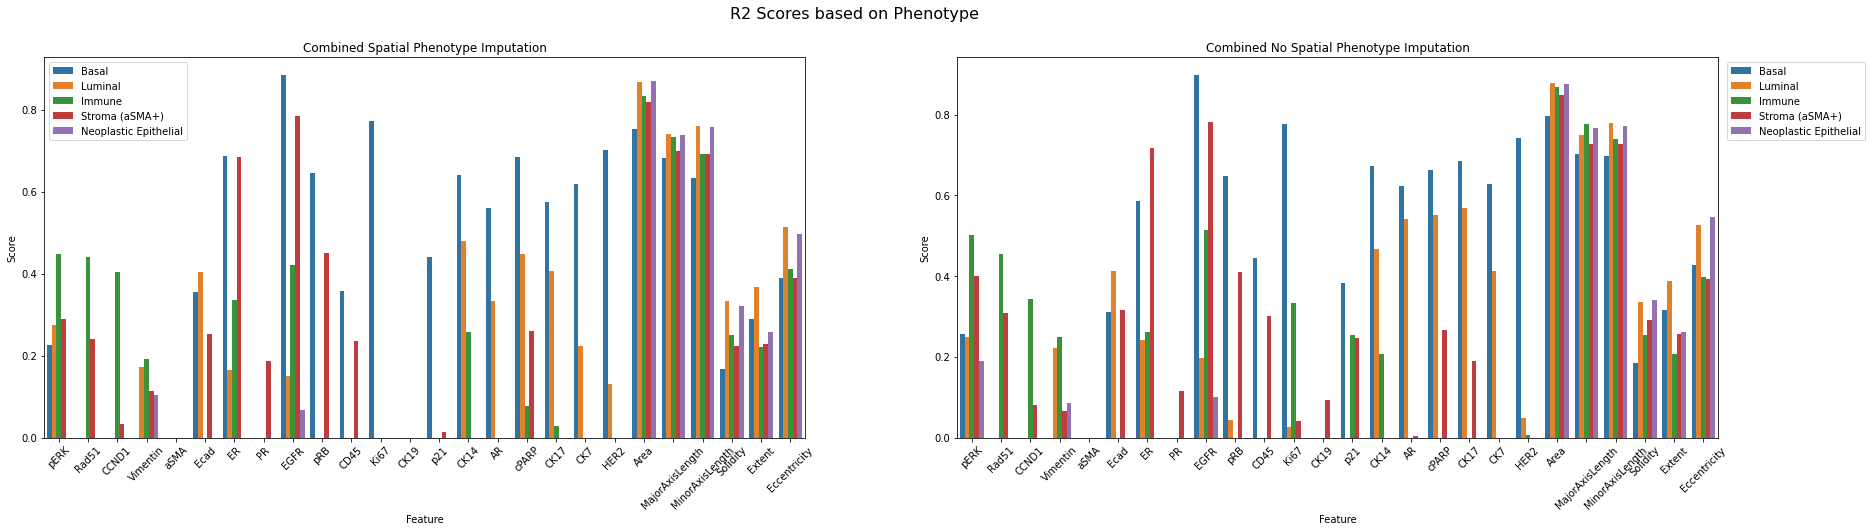

In [60]:
fig, (ax1,ax2) = plt.subplots(1,2)
sns.barplot(x="Feature", y="Score", hue="Phenotype", data=sp_combined_r2_scores, ax=ax1)
sns.barplot(x="Feature", y="Score", hue="Phenotype", data=no_sp_combined_r2_scores, ax=ax2)
fig.set_size_inches(30,7)
fig.suptitle("R2 Scores based on Phenotype", fontsize=16)
ax1.set_title("Combined Spatial Phenotype Imputation")
ax2.set_title("Combined No Spatial Phenotype Imputation")

for ax in fig.axes:
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

ax1.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
ax2.legend(bbox_to_anchor=(1.2, 1), loc='upper right', ncol=1)
plt.show()


# Calculate over all r2 score performance

## Calculate r2 scores from data loaded

In [61]:
no_sp_r2_scores = evaluate_performance(features, index_replacements, normalized_test_data, no_sp_imputed_data)
sp_r2_scores = evaluate_performance(features, index_replacements, normalized_test_data, sp_imputed_data)

no_sp_r2_scores["Origin"] = "No Spatial"
sp_r2_scores["Origin"] = "Spatial"
combined_r2_scores_max_neighbor = pd.concat([no_sp_r2_scores, sp_r2_scores])

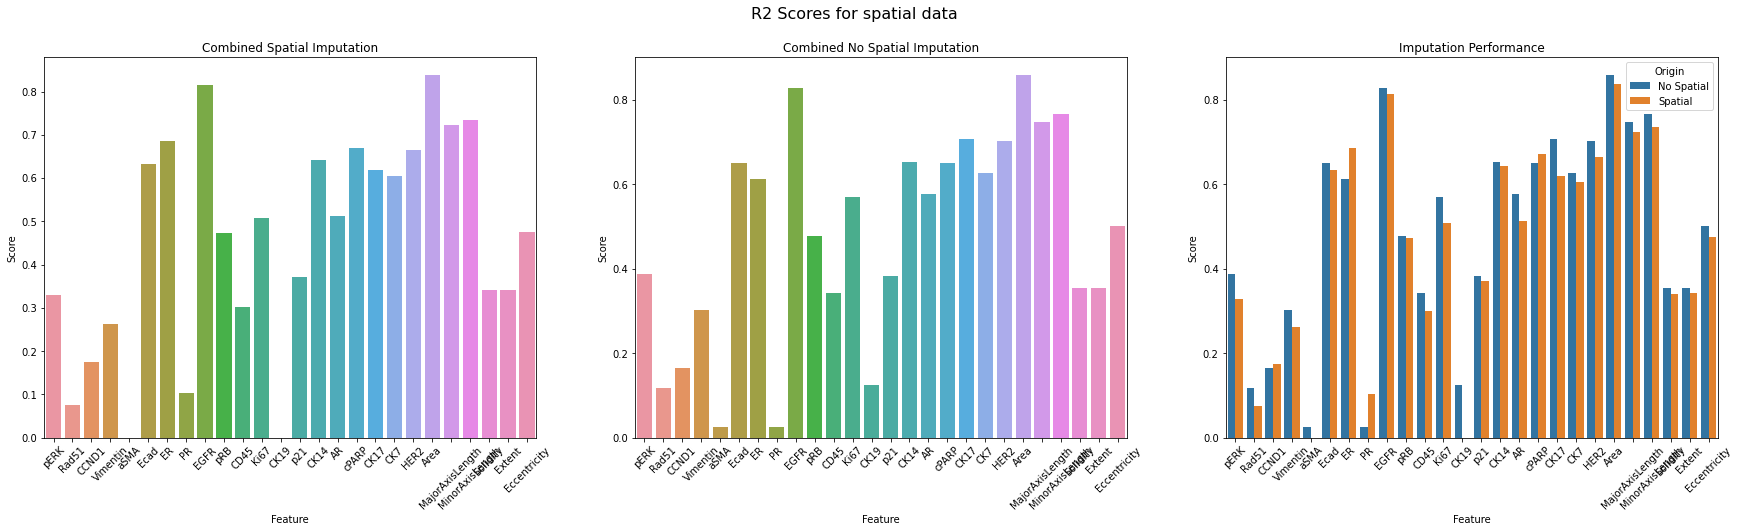

In [62]:
fig, (ax1,ax2, ax3) = plt.subplots(1,3)
sns.barplot(x="Feature", y="Score", data=sp_r2_scores, ax=ax1)
sns.barplot(x="Feature", y="Score", data=no_sp_r2_scores, ax=ax2)
sns.barplot(x="Feature", y="Score", hue="Origin", data=combined_r2_scores_max_neighbor, ax=ax3)
fig.set_size_inches(30,7)
fig.suptitle("R2 Scores for spatial data", fontsize=16)
ax1.set_title("Combined Spatial Imputation")
ax2.set_title("Combined No Spatial Imputation")
ax3.set_title("Imputation Performance")

for ax in fig.axes:
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

plt.show()



## Plot data retrieved by algorithm

In [63]:
combined_r2_scores = pd.read_csv("data/combined_r2_scores.csv")

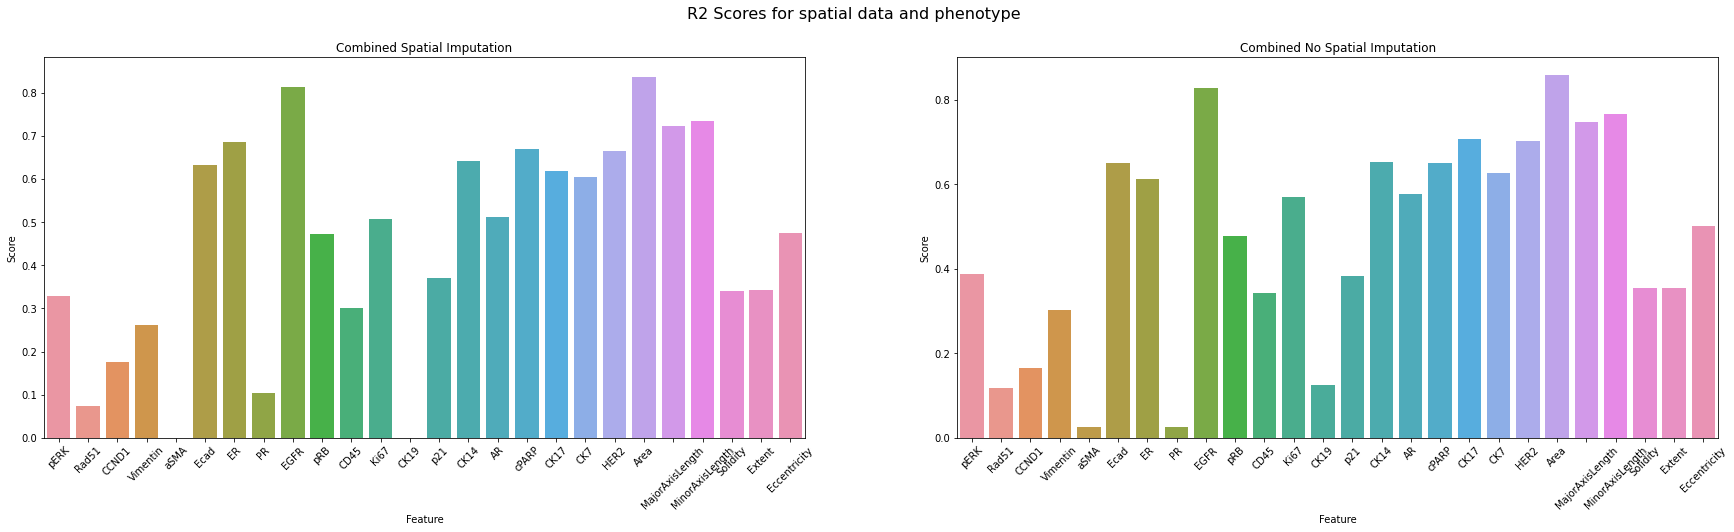

In [71]:
fig, (ax1,ax2) = plt.subplots(1,2)
sns.barplot(x="Feature", y="Score", data=combined_r2_scores[combined_r2_scores["Origin"] == f"spatial {max_neighbor}"], ax=ax1)
sns.barplot(x="Feature", y="Score", data=combined_r2_scores[combined_r2_scores["Origin"] == f"no_spatial {max_neighbor}"], ax=ax2)
fig.set_size_inches(30,7)

fig.suptitle("R2 Scores for spatial data and phenotype", fontsize=16)
ax1.set_title("Combined Spatial Imputation")
ax2.set_title("Combined No Spatial Imputation")

ax1.set_ylim(0)

for ax in fig.axes:
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
plt.show()

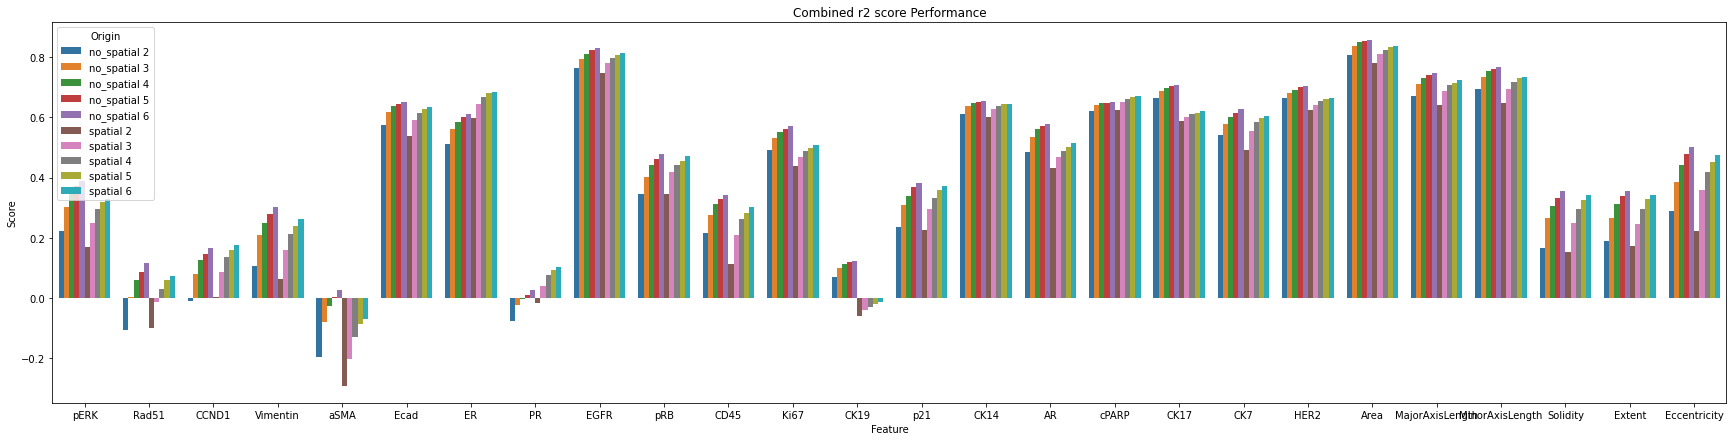

In [67]:
plt.figure(figsize=(30,7))
sns.barplot(x="Feature", y="Score", hue="Origin", data=combined_r2_scores)
fig.set_size_inches(30,7)
for ax in fig.axes:
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
        
plt.title("Combined r2 score Performance")
plt.show()

In [68]:
combined_r2_scores["Group"] = combined_r2_scores.apply(lambda x: "No Spatial" if "no_spatial" in x["Origin"] else "Spatial", axis=1)
combined_r2_scores

,Feature,Score,Origin,Group
0,pERK,0.223691,no_spatial 2,No Spatial
1,Rad51,-0.106551,no_spatial 2,No Spatial
2,CCND1,-0.010202,no_spatial 2,No Spatial
3,Vimentin,0.105831,no_spatial 2,No Spatial
4,aSMA,-0.195689,no_spatial 2,No Spatial
...,...,...,...,...
255,MajorAxisLength,0.723065,spatial 6,Spatial
256,MinorAxisLength,0.734419,spatial 6,Spatial
257,Solidity,0.340797,spatial 6,Spatial
258,Extent,0.341929,spatial 6,Spatial


# Distance comparison 

Compare distances of neighbors for each phenotype